# 🏨 Dynamic Hotel Pricing Optimization
## 📈 02_Demand Forecasting

**Goal:** Build models to forecast demand (number of bookings) per hotel and date.


In [1]:
# 1️⃣ Load Data
import pandas as pd

df = pd.read_csv('../data/raw/hotel_bookings.csv')

# Preprocess date columns
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [2]:
# 2️⃣ Aggregate Demand by Date

# Example: total bookings per day
bookings_by_date = df.groupby('reservation_status_date').size().reset_index(name='bookings')

bookings_by_date.head()


,reservation_status_date,bookings
0,2014-10-17,180
1,2014-11-18,1
2,2015-01-01,763
3,2015-01-02,16
4,2015-01-18,1


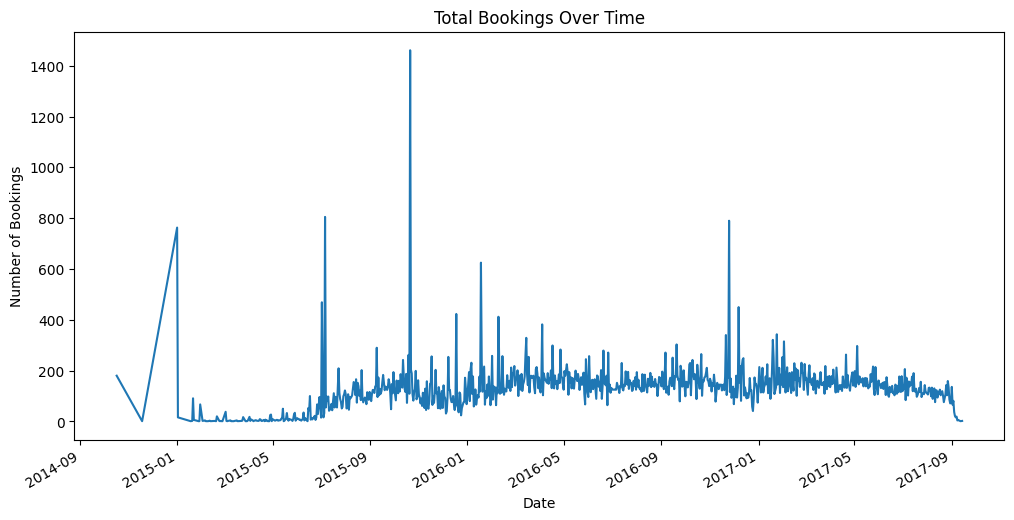

In [3]:
# 3️⃣ Plot Demand Over Time
import matplotlib.pyplot as plt

bookings_by_date.set_index('reservation_status_date')['bookings'].plot(figsize=(12,6))
plt.title('Total Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()


c:\GitHub\DynamicHotelPricingOptimization\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
01:16:33 - cmdstanpy - INFO - Chain [1] start processing
01:16:34 - cmdstanpy - INFO - Chain [1] done processing


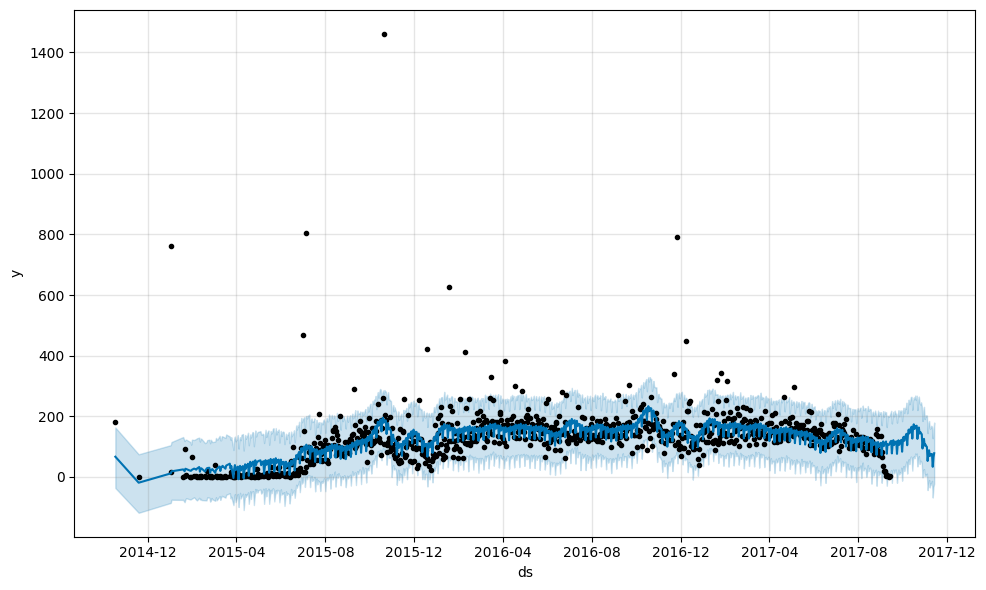

In [4]:
# 4️⃣ Prophet Model
from prophet import Prophet

# Prepare data for Prophet
df_prophet = bookings_by_date.rename(columns={'reservation_status_date': 'ds', 'bookings': 'y'})

# Initialize model
m = Prophet()
m.fit(df_prophet)

# Create future dataframe
future = m.make_future_dataframe(periods=60)  # Forecast 60 days ahead

# Forecast
forecast = m.predict(future)

# Plot forecast
fig = m.plot(forecast)


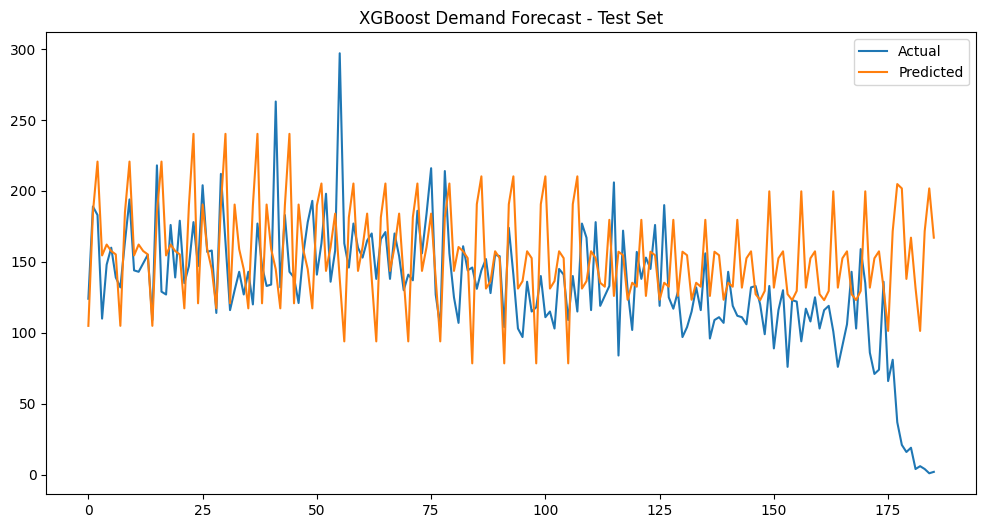

In [5]:
# 5️⃣ XGBoost Model (Optional / Advanced)

# Feature engineering for ML model
bookings_by_date['dayofweek'] = bookings_by_date['reservation_status_date'].dt.dayofweek
bookings_by_date['month'] = bookings_by_date['reservation_status_date'].dt.month
bookings_by_date['year'] = bookings_by_date['reservation_status_date'].dt.year

# Define features and target
features = ['dayofweek', 'month', 'year']
X = bookings_by_date[features]
y = bookings_by_date['bookings']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train XGBoost model
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot predictions
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('XGBoost Demand Forecast - Test Set')
plt.legend()
plt.show()
